# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import API key
from api_keys import (g_key, weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
citiespd = pd.read_csv("../output_data/cities.csv")
citiespd
#I just want to see the cities csv file in here. Will help me get the the Data i need later.


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [17]:
wcity = citiespd.City.tolist()
latcity = citiespd.Lat.tolist()
latcity = citiespd.Lat.tolist()
# wcity
#capture each city name and put in a list. I dont know if i need this or not later on

In [21]:
lat = []
lng = []
temp = []
mintemp = []
maxtemp = []
cloudiness = []
Wspeed = []
humidity = []
city_dates = []
name = []


# Loop through the list of cities and perform a request for data on each
counter = 0 
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

    # Build partial query URL
    query_url = f"{url}&q=" + city
    response = requests.get(query_url).json()

    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        mintemp.append(response['main']['temp_min'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        Wspeed.append(response['wind']['speed'])
        city_dates.append(response['dt'])
        print("City identified: " + city)
    except:
        print("City not found.")
        pass
        





City identified: joetsu
City identified: rikitea
City identified: hithadhoo
City identified: albany
City not found.
City identified: ribeira grande
City identified: grand-santi
City identified: bathsheba
City identified: micheweni
City identified: olafsvik
City identified: busselton
City identified: villazon
City identified: jizan
City not found.
City identified: vaini
City identified: thompson
City identified: socorro
City identified: mersing
City not found.
City identified: airai
City identified: lebu
City identified: punta arenas
City identified: sangar
City identified: butaritari
City identified: bosaso
City identified: toora-khem
City not found.
City identified: norman wells
City identified: aras
City identified: phangnga
City not found.
City identified: provideniya
City identified: garden city
City identified: yellowknife
City identified: victoria
City identified: leningradskiy
City not found.
City identified: ostrovnoy
City identified: carnarvon
City identified: qaanaaq
City not

City identified: gavle
City identified: nanortalik
City identified: hasaki
City identified: oranjestad
City identified: cradock
City identified: comodoro rivadavia
City identified: helong
City identified: kawalu
City identified: espinosa
City identified: shache
City identified: dalnegorsk
City identified: severobaykalsk
City identified: taoudenni
City identified: biak
City not found.
City identified: cap malheureux
City identified: ngozi
City identified: ambilobe
City identified: hovd
City identified: teya
City identified: hinton
City identified: yushu
City identified: illela
City identified: ardabil
City identified: rincon
City identified: diego de almagro
City identified: sao filipe
City identified: hami
City identified: nipawin
City identified: blackwater
City identified: ancud
City identified: kavieng
City identified: mizdah
City identified: pangnirtung
City identified: arandis
City not found.
City identified: tazovskiy
City identified: elbistan
City identified: kenora
City identif

In [58]:
#making a dictionary

Citydf = {"City Name":name,
         "Latitude": lat,
         "Longitude": lng,
          "Temperature": temp,
         "Min. Temp": mintemp,
         "Max. Temp": maxtemp,
         "Cloudiness": cloudiness,
         "Wind Speed": Wspeed,
         "Humidity": humidity,
         "Time": city_dates}

weather_data = pd.DataFrame(Citydf)
weather_data.head()

,City Name,Latitude,Longitude,Temperature,Min. Temp,Max. Temp,Cloudiness,Wind Speed,Humidity,Time
0,Jōetsu,37.15,138.24,24.51,24.01,25.00,100,9.75,90,1608497821
1,Rikitea,-23.12,-134.97,76.69,76.69,76.69,24,22.26,77,1608497821
2,Hithadhoo,-0.60,73.08,82.00,82.00,82.00,0,7.36,73,1608497821
3,Albany,42.60,-73.97,31.23,30.00,32.00,100,1.01,74,1608497821
4,Ribeira Grande,38.52,-28.70,64.40,64.40,64.40,75,20.80,93,1608497822


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
#creating the csv file
weathercsv=weather_data.to_csv('wdataproj.csv', index = False)

In [60]:
#Grabbing the csv file we just made
WeatherCSV = "wdataproj.csv"

#reading the csv file
citywdf = pd.read_csv(WeatherCSV)
citywdf.head()

#Redoing this so if some reason my api gets mess up i dont need to make a new request

,City Name,Latitude,Longitude,Temperature,Min. Temp,Max. Temp,Cloudiness,Wind Speed,Humidity,Time
0,Jōetsu,37.15,138.24,24.51,24.01,25.00,100,9.75,90,1608497821
1,Rikitea,-23.12,-134.97,76.69,76.69,76.69,24,22.26,77,1608497821
2,Hithadhoo,-0.60,73.08,82.00,82.00,82.00,0,7.36,73,1608497821
3,Albany,42.60,-73.97,31.23,30.00,32.00,100,1.01,74,1608497821
4,Ribeira Grande,38.52,-28.70,64.40,64.40,64.40,75,20.80,93,1608497822


In [61]:
citywdf.value_counts()
#doing this so i got something to compare when i drop values 

City Name        Latitude  Longitude  Temperature  Min. Temp  Max. Temp  Cloudiness  Wind Speed  Humidity  Time      
Ţahţā             26.77     31.50     61.05        55.40      66.20      0           11.41       77        1608497825    1
Havre-St-Pierre   50.23    -63.60     26.60        26.60      26.60      90          5.82        86        1608497824    1
Helong            42.54     129.00    12.52        12.52      12.52      0           6.38        84        1608497837    1
Hereford          52.06    -2.71      40.03        39.00      41.00      42          7.29        95        1608497834    1
Hermanus         -34.42     19.23     70.00        70.00      70.00      0           7.00        75        1608497827    1
                                                                                                                        ..
Port Elizabeth   -33.92     25.57     71.60        71.60      71.60      44          9.17        88        1608497829    1
Port Hardy        50.

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [62]:
#  Get the indices of cities that have humidity over 100%.
humidity100 = citywdf[citywdf.Humidity >= 100]
humidity100.head()

#I am unsure what the question was asking so i made greater than or equal to. If its just greater than 100% than this line is not needed

# use this website to get the syntax
# https://stackoverflow.com/questions/37761238/how-do-i-select-and-store-columns-greater-than-a-number-in-pandas

,City Name,Latitude,Longitude,Temperature,Min. Temp,Max. Temp,Cloudiness,Wind Speed,Humidity,Time
16,Airai,-8.93,125.41,61.29,61.29,61.29,100,3.13,100,1608497822
86,Mount Isa,-20.73,139.50,75.20,75.20,75.20,75,3.36,100,1608497826
131,Port Moresby,-9.44,147.18,73.40,73.40,73.40,20,8.05,100,1608497787
154,Klaksvík,62.23,-6.59,42.80,42.80,42.80,77,5.82,100,1608497829
191,Digoin,46.48,3.98,41.09,39.20,43.00,96,3.36,100,1608497831


In [63]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#since there was no humidity > 100 i am skipping this. Unless it wants me to drop all the rows that is equal to or greater 100

#this would be the code if i would have drop the rows. I got got the index  from the last section. Just activate to redo what i did

#i tested it so it works

# dropdf = citywdf.drop([16,86,131,154,191])
# dropdf





In [64]:
# citywdf.value_counts()
#doing another value_counts just so i can compare it again

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

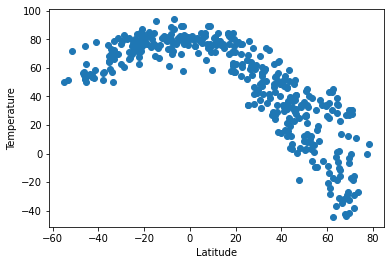

<Figure size 432x288 with 0 Axes>

In [70]:
# Create a Scatter Plot for Latitude vs Temperature
x_values = citywdf['Latitude']
y_values = citywdf['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

plt.savefig('LatvsTemp.png')

## Latitude vs. Humidity Plot

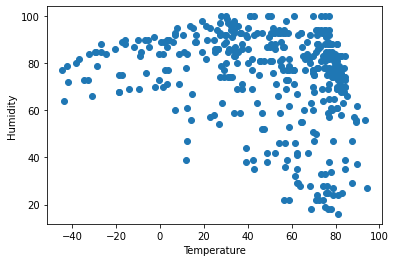

<Figure size 432x288 with 0 Axes>

In [71]:
# Create a Scatter Plot for temperature vs humidity
x_values = citywdf['Temperature']
y_values = citywdf['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()


plt.savefig('TempvsHumidity.png')

## Latitude vs. Cloudiness Plot

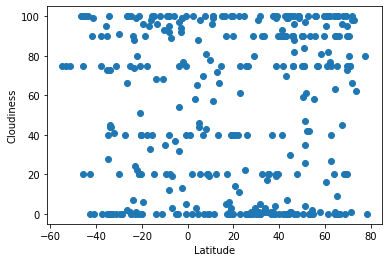

<Figure size 432x288 with 0 Axes>

In [72]:
# Create a Scatter Plot for Latitude vs Cloudiness
x_values = citywdf['Latitude']
y_values = citywdf['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()


plt.savefig('LatvsCloud.png')

## Latitude vs. Wind Speed Plot

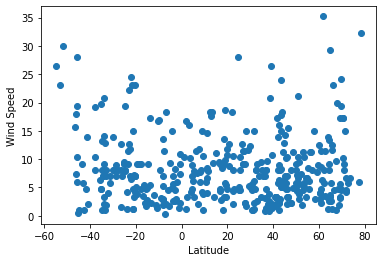

<Figure size 432x288 with 0 Axes>

In [73]:
# Create a Scatter Plot for Latitude vs Wind Speed
x_values = citywdf['Latitude']
y_values = citywdf['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()


plt.savefig('LatvsWindSpeed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression